In [1]:
import numpy as np

import torch
import torch.optim as optim
import torch.nn as nn
from FairRanking.datasets.adult import Adult
import random
from FairRanking.datasets.law import Law
from FairRanking.datasets.compas import Compas
from FairRanking.datasets.wiki import Wiki
from FairRanking.models.DirectRanker import DirectRanker
from FairRanking.models.BaseDirectRanker import convert_data_to_tensors
from FairRanking.models.DirectRankerAdv import DirectRankerAdv
from FairRanking.TrainingFunctions import DirectRankerAdvTrain, DirectRankerTrain, DirectRankerAdvTrainCustom
from FairRanking.helpers import rND_torch, nDCG_cls_no_model, auc_estimator, group_pairwise_accuracy, auc_estimator2, nDCG_cls

In [2]:
path = '../Results/DirectRankerAdv/Adult/T-Test/SGD/results.csv'
with open(path, 'w') as file:
    file.write(f'nDCG,AUC,rND,GPA,Schedule\n')

In [3]:
def write_results(model, X, y, s, schedule, path):
    model.eval()
    with torch.no_grad():
        #pred = model.predict_proba(X)
        pred = model(X, torch.zeros_like(X, dtype=torch.float32))
        ndcg_list = []
        for _ in range(10):
            ndcg_i = nDCG_cls(pred, y, esti=False, trec=False, at=500)
            ndcg_list.append(ndcg_i)
        ndcg = np.mean(ndcg_list)
        auc = auc_estimator2(pred, y, multiclass=False)
        rnd_list = []
        for _ in range(10):
            rnd_list.append(rND_torch(pred, torch.argmax(s, dim=1)))
        rnd = np.mean(rnd_list)
        gpa = group_pairwise_accuracy(pred, y, s)
        with open(path, 'a') as file:
            file.write(f'{ndcg},{auc},{rnd},{gpa},{str(schedule).replace(",",";")}\n')


In [6]:
#data = Law('Gender','/Users/robert/Desktop/Bachelor/FairRanker/data')
data = Adult('/Users/robert/Desktop/Bachelor/FairRanker/data')
#data = Compas('/Users/robert/Desktop/Bachelor/FairRanker/data')
#data = Wiki()
n_epochs = 1000
hidden_layers = [64, 32]
bias_layers = [64, 32]
main_lr = 0.01
adv_lr = 0.01
schedules = [[1, 1], [1, 2], [2, 1], [1, 3], [3, 1], [1,4], [4,1], [1, 5], [5, 1]]
#schedules = [[1, 5], [5, 1]]
for schedule in schedules:
        for i in range(30):
            data.got_data = False
            full_data = data.get_data(random_state=random.randint(1, 100))
            model = DirectRankerAdv(num_features=full_data[0][0].shape[1],
                            kernel_initializer=nn.init.normal_,
                            hidden_layers=hidden_layers,
                            bias_layers=bias_layers,
                            num_classes=data.num_relevance_classes,
                            random_seed=random.random()
                    )
            model = DirectRankerAdvTrain.train(model, full_data, n_epochs=n_epochs, schedule=schedule, threshold=0.0, adv_lr=adv_lr, main_lr=main_lr, print_res=False, random_seed=random.random(),
                                               main_optimizer=optim.SGD, adv_optimizer=optim.SGD)
            write_results(model, full_data[2][0], full_data[2][1], full_data[2][2], schedule, path)
            print(f'Finished Schedule: {schedule} run {i+1}')
print('Finished Scheduling')



Finished Schedule: [1, 1] run 1
Finished Schedule: [1, 1] run 2
Finished Schedule: [1, 1] run 3
Finished Schedule: [1, 1] run 4
Finished Schedule: [1, 1] run 5
Finished Schedule: [1, 1] run 6
Finished Schedule: [1, 1] run 7
Finished Schedule: [1, 1] run 8
Finished Schedule: [1, 1] run 9
Finished Schedule: [1, 1] run 10
Finished Schedule: [1, 1] run 11
Finished Schedule: [1, 1] run 12
Finished Schedule: [1, 1] run 13
Finished Schedule: [1, 1] run 14
Finished Schedule: [1, 1] run 15
Finished Schedule: [1, 1] run 16
Finished Schedule: [1, 1] run 17
Finished Schedule: [1, 1] run 18
Finished Schedule: [1, 1] run 19
Finished Schedule: [1, 1] run 20
Finished Schedule: [1, 1] run 21
Finished Schedule: [1, 1] run 22
Finished Schedule: [1, 1] run 23
Finished Schedule: [1, 1] run 24
Finished Schedule: [1, 1] run 25
Finished Schedule: [1, 1] run 26
Finished Schedule: [1, 1] run 27
Finished Schedule: [1, 1] run 28
Finished Schedule: [1, 1] run 29
Finished Schedule: [1, 1] run 30
Finished Schedule: 

In [3]:
from FairRanking.writer import Writer
#data = Law('Race','/Users/robert/Desktop/Bachelor/FairRanker/data')
#data = Adult('/Users/robert/Desktop/Bachelor/FairRanker/data')
data = Compas('/Users/robert/Desktop/Bachelor/FairRanker/data')
#data = Wiki()
writer = Writer('Compas', 'DirectRankerAdv')
n_epochs = 1000
hidden_layers = [64, 32, 16]
bias_layers = [64, 32, 16]
main_lr = 0.01
adv_lr = 0.01

data.got_data = False
full_data = data.get_data(random_state=random.randint(1, 100))
model = DirectRankerAdv(num_features=full_data[0][0].shape[1],
                kernel_initializer=nn.init.normal_,
                hidden_layers=hidden_layers,
                bias_layers=bias_layers,
                num_classes=len(torch.unique(full_data[0][1])),
                random_seed=random.random()
        )
model = DirectRankerAdvTrain.train(model, full_data, n_epochs=n_epochs, schedule=[1,1], threshold=0.0, adv_lr=adv_lr, main_lr=main_lr, print_res=False, random_seed=random.random(), writer=writer)





/opt/anaconda3/envs/pytorchbook/lib/python3.10/site-packages/FairRanking/datasets/compas.py:25: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  self.df.loc[:, x_name] = scaler.fit_transform(self.df.loc[:, x_name])
/opt/anaconda3/envs/pytorchbook/lib/python3.10/site-packages/FairRanking/datasets/compas.py:25: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  self.df.loc[:, x_name] = scaler.fit_transform(self.df.loc[:, x_name])
/opt/anaconda3/envs/pytorchbook/lib/python3.10/site-packages/FairRanking/datasets/compas.py:25: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  self.df.loc[:, x_name] = scaler.fit_transform(self.df.loc[:, x_name])
/opt/anaconda3/envs/pytorchbook/lib/python3.10/site-packages/FairRanking/datasets/compas.py:26: FutureWarning: Passing a set as an indexer is deprecated and 

[INFO] Created SummaryWriter saving to logs/DirectRankerAdv/Compas


KeyboardInterrupt: 

In [53]:
from FairRanking.writer import Writer
data = Law('Race','/Users/robert/Desktop/Bachelor/FairRanker/data')
#data = Adult('/Users/robert/Desktop/Bachelor/FairRanker/data')
#data = Compas('/Users/robert/Desktop/Bachelor/FairRanker/data')
#data = Wiki()
writer = Writer('Law-Race', 'DirectRankerAdv', extra='Custom')
n_epochs = 1000
hidden_layers = [64, 16]
bias_layers = [64, 16]
main_lr = 0.01
adv_lr = 0.01

data.got_data = False
full_data = data.get_data(random_state=random.randint(1, 100))
model = DirectRankerAdv(num_features=full_data[0][0].shape[1],
                kernel_initializer=nn.init.normal_,
                hidden_layers=hidden_layers,
                bias_layers=bias_layers,
                num_classes=len(torch.unique(full_data[0][1])),
                random_seed=random.random()
        )
model = DirectRankerAdvTrainCustom.train(model, full_data, n_epochs=n_epochs, schedule=[1,1], threshold=1.4, change_step=0.01, adv_lr=adv_lr, main_lr=main_lr, print_res=False, random_seed=random.random(), writer=writer,
                                         main_optimizer=optim.SGD, adv_optimizer=optim.SGD)





[INFO] Created SummaryWriter saving to logs/DirectRankerAdv/Law-Race/Custom


In [54]:
X = full_data[2][0]
y = full_data[2][1]
s = full_data[2][2]
model.eval()
with torch.no_grad():
    pred = model.predict_proba(X)
    pred = model(X, torch.zeros_like(X, dtype=torch.float32))
    ndcg_list = []
    ndcg = nDCG_cls(pred, y, esti=False, trec=False, at=500)
    auc = auc_estimator2(pred, y, multiclass=True)

    rnd = rND_torch(pred, torch.argmax(s, dim=1))
    gpa = group_pairwise_accuracy(pred, y, s)

    print(f'{ndcg},{auc},{rnd},{gpa}')



0.9532634967706698,0.011958724796391266,0.30309267452971117,0.012943300180132233


# Getting on the Custom Train function 30 samples

In [45]:
path = '../Results/DirectRankerAdv/Law-Race/Custom/results2.csv'
with open(path, 'w') as file:
    file.write(f'nDCG,AUC,rND,GPA\n')

In [46]:
def write_results(model, X, y, s, path):
    model.eval()
    with torch.no_grad():
        #pred = model.predict_proba(X)
        pred = model(X, torch.zeros_like(X, dtype=torch.float32))
        ndcg = nDCG_cls(pred, y, esti=False, trec=False, at=500)
        auc = auc_estimator2(pred, y, multiclass=True)
        rnd = rND_torch(pred, torch.argmax(s, dim=1))
        gpa = group_pairwise_accuracy(pred, y, s)
        with open(path, 'a') as file:
            file.write(f'{ndcg},{auc},{rnd},{gpa}\n')


In [47]:
data = Law('Race','/Users/robert/Desktop/Bachelor/FairRanker/data')
#data = Adult('/Users/robert/Desktop/Bachelor/FairRanker/data')
#data = Compas('/Users/robert/Desktop/Bachelor/FairRanker/data')
#data = Wiki()
n_epochs = 1000
hidden_layers = [64, 32, 16]
bias_layers = [64, 32, 16]
main_lr = 0.01
adv_lr = 0.01

for i in range(30):
        data.got_data = False
        full_data = data.get_data(random_state=random.randint(1, 100))
        model = DirectRankerAdv(num_features=full_data[0][0].shape[1],
                        kernel_initializer=nn.init.normal_,
                        hidden_layers=hidden_layers,
                        bias_layers=bias_layers,
                        num_classes=len(torch.unique(full_data[0][1])),
                        random_seed=random.random()
                )
        model = DirectRankerAdvTrainCustom.train(model, full_data, n_epochs=n_epochs, schedule=[1,1], threshold=0.0, adv_lr=adv_lr, main_lr=main_lr, print_res=False, random_seed=random.random())
        write_results(model, full_data[2][0], full_data[2][1], full_data[2][2], path)
        print(f'Finished run: {i+1}')
print('Finished Scheduling')



Finished run: 1
Finished run: 2
Finished run: 3
Finished run: 4
Finished run: 5
Finished run: 6
Finished run: 7
Finished run: 8
Finished run: 9
Finished run: 10
Finished run: 11
Finished run: 12
Finished run: 13
Finished run: 14
Finished run: 15
Finished run: 16
Finished run: 17
Finished run: 18
Finished run: 19
Finished run: 20
Finished run: 21
Finished run: 22
Finished run: 23
Finished run: 24
Finished run: 25
Finished run: 26
Finished run: 27
Finished run: 28
Finished run: 29
Finished run: 30
Finished Scheduling


1


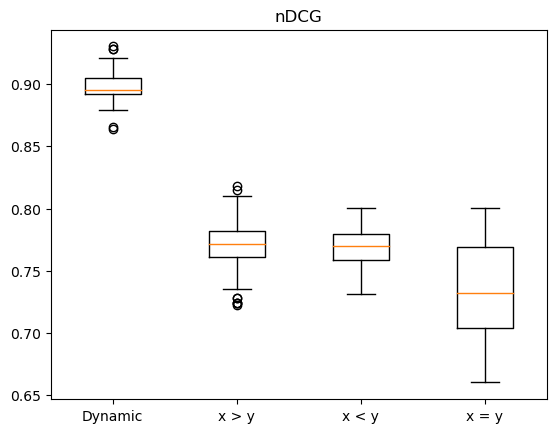

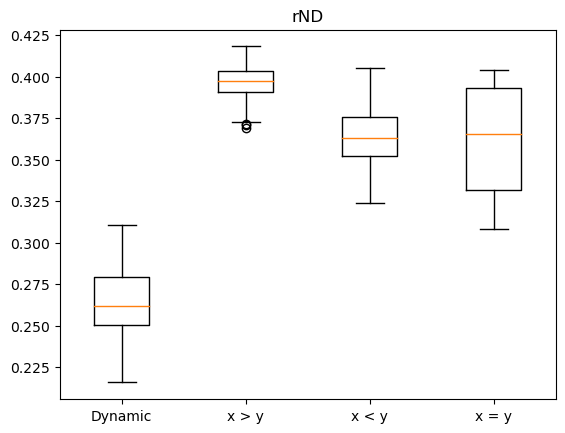

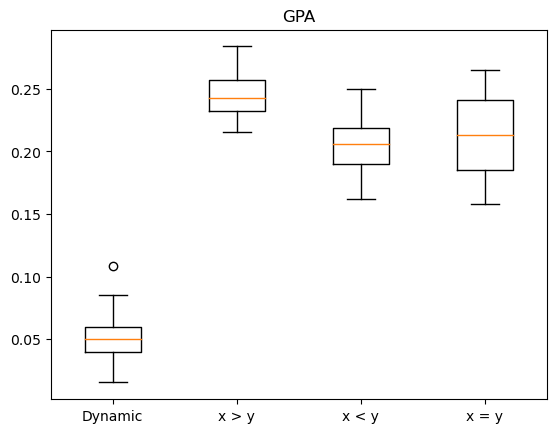

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
dataset='Adult'
df = pd.read_csv(f'../Results/DirectRankerAdv/{dataset}/Custom/results.csv')
metrics = ['nDCG','rND','GPA']
df2 = pd.read_csv(f'../Results/DirectRankerAdv/{dataset}/T-Test/SGD/results.csv')
#metrics = ['Main Accuracy', 'GPA']
metric = 'rND'
df2['Main Schedule'] = df2.apply(lambda x: int(x['Schedule'][1]), axis=1)
df2['Adv Schedule'] = df2.apply(lambda x: int(x['Schedule'][4]), axis=1)
print(df2['Adv Schedule'].iloc[-1])
greater_main_df = df2[df2['Main Schedule'] > df2['Adv Schedule']]
greater_adv_df = df2[df2['Adv Schedule'] > df2['Main Schedule']]
exact_df = df2[df2['Adv Schedule'] == df2['Main Schedule']]

for metric in metrics:
    group1 = greater_main_df[metric]
    group2 = greater_adv_df[metric]
    group3 = exact_df[metric]
    data_to_plot = [df[metric], group1, group2, group3]
    fig, ax = plt.subplots()

    # Create the boxplot
    ax.boxplot(data_to_plot)

    # Set x-axis labels (optional)
    ax.set_xticklabels(['Dynamic', 'x > y', 'x < y', 'x = y'])
    ax.set_title(f'{metric}')
    #fig.savefig(f'./DebiasClassifier/Distributions/{dataset}_{metric}.png', dpi=1200)



/var/folders/nx/wz1vqyld77ncdjz679wgbm_m0000gn/T/ipykernel_758/2440588535.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greater_main_df['1-rND'] = greater_main_df.apply(lambda x: 1-x['rND'], axis=1)
/var/folders/nx/wz1vqyld77ncdjz679wgbm_m0000gn/T/ipykernel_758/2440588535.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greater_adv_df['1-rND'] = greater_adv_df.apply(lambda x: 1-x['rND'], axis=1)
/var/folders/nx/wz1vqyld77ncdjz679wgbm_m0000gn/T/ipykernel_758/2440588535.py:20: SettingWithCopyWarnin

Text(0, 0.5, '1-rND')

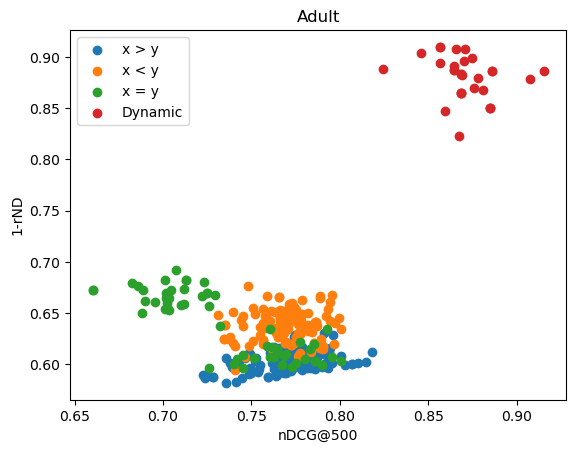

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset='Adult'
metrics = ['nDCG', 'rND', 'GPA']
model = 'DirectRankerAdv'
df = pd.read_csv(f'../Results/{model}/{dataset}/Custom/results.csv')
df3 = pd.read_csv(f'../Results/{model}/{dataset}/Custom/results2.csv')
df2 = pd.read_csv(f'../Results/{model}/{dataset}/T-Test/SGD/results.csv')

df2['Main Schedule'] = df2.apply(lambda x: int(x['Schedule'][1]), axis=1)
df2['Adv Schedule'] = df2.apply(lambda x: int(x['Schedule'][4]), axis=1)

greater_main_df = df2[df2['Main Schedule'] > df2['Adv Schedule']]
greater_adv_df = df2[df2['Adv Schedule'] > df2['Main Schedule']]
exact_df = df2[df2['Adv Schedule' ] == df2['Main Schedule']]
greater_main_df['1-rND'] = greater_main_df.apply(lambda x: 1-x['rND'], axis=1)
greater_adv_df['1-rND'] = greater_adv_df.apply(lambda x: 1-x['rND'], axis=1)
exact_df['1-rND'] = exact_df.apply(lambda x: 1-x['rND'], axis=1)
df3['1-rND'] = df3.apply(lambda x: 1-x['rND'], axis=1)
fig, ax = plt.subplots(1)

accs = [np.median(greater_main_df['nDCG']), np.median(greater_adv_df['nDCG']), np.median(exact_df['nDCG']), np.median(df3['nDCG'])]
rnds = [np.median(greater_main_df['1-rND']), np.median(greater_adv_df['1-rND']), np.median(exact_df['1-rND']), np.median(df3['1-rND'])]
accs = [greater_main_df['nDCG'], greater_adv_df['nDCG'], exact_df['nDCG'], df3['nDCG']]
rnds = [greater_main_df['1-rND'], greater_adv_df['1-rND'], exact_df['1-rND'], df3['1-rND']]
#ax.boxplot(data_to_plot)
for i in range(len(accs)):
    ax.scatter(accs[i], rnds[i])
ax.legend(['x > y', 'x < y', 'x = y', 'Dynamic'])
ax.set_title(f'{dataset}')
ax.set_xlabel('nDCG@500')
ax.set_ylabel('1-rND')
#fig.savefig(f'../InterpretingResults/DebiasClassifier/ComparingClassifiers/{dataset}.png', dpi=1200)
